<h1 align="center"> Project Setup </h1>

#### Install Packages

In [1]:
!pip install yellowbrick

#### Importing Dependencies

In [2]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('ignore')

#### Importing Datasets

In [3]:
# Display all columns in the DataFrame using pandas settings
pd.set_option('display.max_columns', None)

In [4]:
df_imports = pd.read_excel('data/simple_WTO_dataset_merchandise_imports_by_product_group_annual_million_US_dollar.xlsx')

<br><br>

<h1 align="center"> Summary</h1>

### Objective

This project focuses on how the country will be able to know the right market to export their products. This will allow the country to get a good guide on foreign trade, and know which countries have High demand in different sectors, especially agricultural products.

The specific objectives of this project are:
1. Analyze the dataset that we are going to collect to better understand and give
some insight on the international trade
2. Choose the best place with the High demand for agricultural products so that Haiti can promote and sell its products

<hr>

### Hypothesis: Research Question?

What is the question that you would like to answer in order to make a decision.

<hr>

### Data Source

For this project we will be using the World Trade Organization(WTO) data portal to have access to. The WTO Data portal contains statistical indicators, Available time series cover merchandise trade and trade in services statistics, market access indicators (bound, applied & preferential tariffs), non-tariff information as well as other indicators.

<br><br>

<h1 align="center"> Data Cleaning </h1>

#### Introduce the Data

In [5]:
# Displaying the countries import product dataframe
print('------ Imports Dataset ------')
display(df_imports.head(4))

------ Imports Dataset ------


,Indicator,Merchandise imports by product group – annual (Million US dollar),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Reporting Economy,Product/Sector,Partner Economy,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
2,Afghanistan,SI3_AGG - AG - Agricultural products,World,706.0,897.0,1248.0,1200.0,1064.0,1485.0,1539.0,1740.0,2656.0,2484.0
3,Afghanistan,SI3_AGG - MI - Fuels and mining products,World,1090.0,2240.0,3118.0,2999.0,2657.0,1658.0,1045.0,1181.0,1102.0,340.0


In [6]:
print('------------------------------ Dataset Shape ------------------------------')
print('The Imports dataset has',df_imports.shape[0], 'Rows and', df_imports.shape[1],'columns')

print('------------------------------ Dataframe Columns ------------------------------')
display(df_imports.columns)

print('------------------------------ Data types ------------------------------')
display(df_imports.dtypes)

------------------------------ Dataset Shape ------------------------------
The Imports dataset has 1293 Rows and 13 columns
------------------------------ Dataframe Columns ------------------------------


Index(['Indicator',
       '  Merchandise imports by product group – annual (Million US dollar)',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

------------------------------ Data types ------------------------------


Indicator                                                               object
  Merchandise imports by product group – annual (Million US dollar)     object
Unnamed: 2                                                              object
Unnamed: 3                                                             float64
Unnamed: 4                                                             float64
Unnamed: 5                                                             float64
Unnamed: 6                                                             float64
Unnamed: 7                                                             float64
Unnamed: 8                                                             float64
Unnamed: 9                                                             float64
Unnamed: 10                                                            float64
Unnamed: 11                                                            float64
Unnamed: 12                                         

In [7]:
# Display all columns
print('-------- Imports column names --------')
display(df_imports.columns)

# Change columns name
map_cols_name = {
    'Indicator':'Reporting Economy',
    '  Merchandise imports by product group – annual (Million US dollar)': 'Product/Sector',
    'Unnamed: 2': 'Partner Economy',
    'Unnamed: 3': '2010',
    'Unnamed: 4': '2011',
    'Unnamed: 5': '2012',
    'Unnamed: 6': '2013',
    'Unnamed: 7': '2014',
    'Unnamed: 8': '2015',
    'Unnamed: 9': '2016',
    'Unnamed: 10': '2017',
    'Unnamed: 11': '2018',
    'Unnamed: 12': '2019',
}

# Change all default column names
renamed_cols_df = df_imports.rename(columns=map_cols_name)

print('-------- Imports Dataframe with new cols names --------')
display(renamed_cols_df.head(5))

-------- Imports column names --------


Index(['Indicator',
       '  Merchandise imports by product group – annual (Million US dollar)',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

-------- Imports Dataframe with new cols names --------


,Reporting Economy,Product/Sector,Partner Economy,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Reporting Economy,Product/Sector,Partner Economy,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
2,Afghanistan,SI3_AGG - AG - Agricultural products,World,706.0,897.0,1248.0,1200.0,1064.0,1485.0,1539.0,1740.0,2656.0,2484.0
3,Afghanistan,SI3_AGG - MI - Fuels and mining products,World,1090.0,2240.0,3118.0,2999.0,2657.0,1658.0,1045.0,1181.0,1102.0,340.0
4,Afghanistan,SI3_AGG - MAIS - Iron and steel,World,42.0,69.0,96.0,93.0,82.0,25.0,25.0,29.0,218.0,51.0


In [8]:
'''
Remove the first 2 rows in the imports dataframe 
And also drop rows that contains the world import record and Haiti record
'''
drop_first_rows = renamed_cols_df.index[:2]
drop_countries_n_world = renamed_cols_df.loc[(renamed_cols_df['Reporting Economy'] == "Haiti") | (renamed_cols_df['Reporting Economy'] == "World")]

dropped_first_rows_df = renamed_cols_df.drop(drop_first_rows)
dropped_rows_df = dropped_first_rows_df.drop(drop_countries_n_world.index, axis=0).reset_index(drop=True)

display(dropped_rows_df)

,Reporting Economy,Product/Sector,Partner Economy,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,SI3_AGG - AG - Agricultural products,World,706.0,897.0,1248.0,1200.0,1064.0,1485.0,1539.0,1740.0,2656.0,2484.0
1,Afghanistan,SI3_AGG - MI - Fuels and mining products,World,1090.0,2240.0,3118.0,2999.0,2657.0,1658.0,1045.0,1181.0,1102.0,340.0
2,Afghanistan,SI3_AGG - MAIS - Iron and steel,World,42.0,69.0,96.0,93.0,82.0,25.0,25.0,29.0,218.0,51.0
3,Afghanistan,SI3_AGG - MACH - Chemicals,World,82.0,98.0,136.0,131.0,116.0,96.0,98.0,110.0,281.0,621.0
4,Afghanistan,SI3_AGG - MAMT - Machinery and transport equip...,World,339.0,245.0,342.0,329.0,291.0,214.0,360.0,407.0,869.0,1502.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Zimbabwe,SI3_AGG - MAIS - Iron and steel,World,105.0,160.0,149.0,138.0,147.0,141.0,137.0,119.0,173.0,144.0
1283,Zimbabwe,SI3_AGG - MACH - Chemicals,World,605.0,2650.0,1049.0,1850.0,1083.0,961.0,796.0,835.0,1234.0,895.0
1284,Zimbabwe,SI3_AGG - MAMT - Machinery and transport equip...,World,1859.0,1831.0,1911.0,1554.0,1328.0,1415.0,1147.0,1096.0,1553.0,1160.0
1285,Zimbabwe,SI3_AGG - MATE - Textiles,World,67.0,88.0,91.0,87.0,83.0,73.0,53.0,62.0,80.0,66.0


In [9]:
print('------------ Display values in the Product/Sectors on the Import dataset columns ------------')
display(dropped_rows_df['Product/Sector'].value_counts())

# Remove all non use coverage CODE before the last hyphen in all value in the "Product/sector" column
dropped_rows_df['Product/Sector'] = dropped_rows_df['Product/Sector'].apply(lambda x: x.split('- ')[-1])

# Also drop the ['Partner Economy']columns
df_final = dropped_rows_df.drop(['Partner Economy'],axis=1)

print('---- Final import dataframe ----')
display(df_final.head())

------------ Display values in the Product/Sectors on the Import dataset columns ------------


SI3_AGG - MACH - Chemicals                            184
SI3_AGG - MI - Fuels and mining products              184
SI3_AGG - MAMT - Machinery and transport equipment    184
SI3_AGG - MAIS - Iron and steel                       184
SI3_AGG - MACL - Clothing                             184
SI3_AGG - AG - Agricultural products                  184
SI3_AGG - MATE - Textiles                             183
Name: Product/Sector, dtype: int64

---- Final import dataframe ----


,Reporting Economy,Product/Sector,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,Agricultural products,706.0,897.0,1248.0,1200.0,1064.0,1485.0,1539.0,1740.0,2656.0,2484.0
1,Afghanistan,Fuels and mining products,1090.0,2240.0,3118.0,2999.0,2657.0,1658.0,1045.0,1181.0,1102.0,340.0
2,Afghanistan,Iron and steel,42.0,69.0,96.0,93.0,82.0,25.0,25.0,29.0,218.0,51.0
3,Afghanistan,Chemicals,82.0,98.0,136.0,131.0,116.0,96.0,98.0,110.0,281.0,621.0
4,Afghanistan,Machinery and transport equipment,339.0,245.0,342.0,329.0,291.0,214.0,360.0,407.0,869.0,1502.0


#### More data cleaning

In [10]:
df_melt = df_final.copy()

In [11]:
# Melt the Dataframe
df_melt = pd.melt(frame=df_final, 
                  id_vars=['Product/Sector','Reporting Economy'], 
                  var_name='Year', 
                  value_name="Million US dollar")

# Reshape the dataframe using pivot_table
reshape = df_melt.pivot_table(columns='Product/Sector',
                             index=['Year','Reporting Economy'],
                             values="Million US dollar")

# Reset the index to have a beautifull dataframe
reshape = reshape.reset_index()

# Remove Index name
reshape = reshape.rename_axis(None, axis=1)

# Display the reshape DF 
reshape.head()

,Year,Reporting Economy,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles
0,2010,Afghanistan,706.0,82.0,12.0,1090.0,42.0,339.0,118.0
1,2010,Albania,872.0,464.0,173.0,802.0,209.0,875.0,168.0
2,2010,Algeria,7350.0,4452.0,183.0,1493.0,5235.0,16716.0,351.0
3,2010,Angola,2882.0,963.0,127.0,3233.0,1046.0,6475.0,108.0
4,2010,Antigua and Barbuda,113.0,33.0,8.0,6.0,6.0,99.0,12.0


#### Treatment of Missing Values

In [12]:
# Checking for missing values in the import dataset
reshape.isnull().sum()

Year                                 0
Reporting Economy                    0
Agricultural products                2
Chemicals                            0
Clothing                             2
Fuels and mining products            0
Iron and steel                       2
Machinery and transport equipment    0
Textiles                             4
dtype: int64

In [13]:
reshape.shape

(1750, 9)

In [14]:
# check if we don't have Duplicated values in the dataframe
print(reshape.duplicated().sum(), 'value')

0 value


In [15]:
# Dealing with missing single value with the fillna function
df_reshape_fill_na = reshape.fillna(0)

In [16]:
print('---- World import dataset ----')
display(df_reshape_fill_na.isna().sum())


print('---------------')
display('Now all of our empty values have been successfully filled with 0')

---- World import dataset ----


Year                                 0
Reporting Economy                    0
Agricultural products                0
Chemicals                            0
Clothing                             0
Fuels and mining products            0
Iron and steel                       0
Machinery and transport equipment    0
Textiles                             0
dtype: int64

---------------


'Now all of our empty values have been successfully filled with 0'

In [17]:
# Change data type Float --> Int
print('-------- old data type --------')
display(df_reshape_fill_na.dtypes)


# Change Float type to Int (From the "Agricultural products" to "Total merchandise" columns)
df_reshape_fill_na.iloc[:,2:] = df_reshape_fill_na.iloc[:,2:].astype(int)

# Dataframe final
df = df_reshape_fill_na

print('-------- New import data type --------')
display(df.dtypes)

-------- old data type --------


Year                                  object
Reporting Economy                     object
Agricultural products                float64
Chemicals                            float64
Clothing                             float64
Fuels and mining products            float64
Iron and steel                       float64
Machinery and transport equipment    float64
Textiles                             float64
dtype: object

-------- New import data type --------


Year                                 object
Reporting Economy                    object
Agricultural products                 int64
Chemicals                             int64
Clothing                              int64
Fuels and mining products             int64
Iron and steel                        int64
Machinery and transport equipment     int64
Textiles                              int64
dtype: object

In [18]:
print('-------- Display the final dataframe --------')
display(df)

print('-------- Export the final dataframe --------')
file_name = 'final_dataframe_export.xlsx'
df.to_excel(f'output/data/{file_name}', index=False)
print('DataFrame is written to Excel File successfully...')

-------- Display the final dataframe --------


,Year,Reporting Economy,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles
0,2010,Afghanistan,706,82,12,1090,42,339,118
1,2010,Albania,872,464,173,802,209,875,168
2,2010,Algeria,7350,4452,183,1493,5235,16716,351
3,2010,Angola,2882,963,127,3233,1046,6475,108
4,2010,Antigua and Barbuda,113,33,8,6,6,99,12
...,...,...,...,...,...,...,...,...,...
1745,2019,"Venezuela, Bolivarian Republic of",1334,696,117,1022,63,1122,93
1746,2019,Viet Nam,26023,29675,932,25353,10516,108747,17284
1747,2019,Yemen,1871,331,60,1363,214,467,71
1748,2019,Zambia,570,1436,71,1624,259,2185,51


-------- Export the final dataframe --------
DataFrame is written to Excel File successfully...


# <h1 align="center"> Data Analysis </h1>

#### Descriptive Statistical Analysis

In [19]:
# basic statistical measures such as measurements of central tendancy such as mean, median and mode.
print('------ Average ------')
display(df.mean())

print('------ Median ------')
display(df.median())

print('------ Skewness ------')
display(df.skew())

print('------ Max ------')
display(df.max())

print('------ Standard Deviation ------')
display(df.std())

------ Average ------


Year                                          inf
Agricultural products                9.640931e+03
Chemicals                            1.183266e+04
Clothing                             2.410091e+03
Fuels and mining products            1.906265e+04
Iron and steel                       2.546267e+03
Machinery and transport equipment    3.618725e+04
Textiles                             1.485332e+03
dtype: float64

------ Median ------


Year                                 2014.0
Agricultural products                1877.0
Chemicals                            1521.5
Clothing                              189.0
Fuels and mining products            1965.5
Iron and steel                        483.5
Machinery and transport equipment    3557.5
Textiles                              274.5
dtype: float64

------ Skewness ------


Year                                 0.006117
Agricultural products                4.646904
Chemicals                            4.642859
Clothing                             7.516163
Fuels and mining products            5.779798
Iron and steel                       3.944037
Machinery and transport equipment    6.103953
Textiles                             4.741165
dtype: float64

------ Max ------


Year                                     2019
Reporting Economy                    Zimbabwe
Agricultural products                  199397
Chemicals                              271784
Clothing                                96898
Fuels and mining products              579700
Iron and steel                          49373
Machinery and transport equipment     1103063
Textiles                                31883
dtype: object

------ Standard Deviation ------


Agricultural products                 22693.821464
Chemicals                             29350.843737
Clothing                               8491.005557
Fuels and mining products             57301.712940
Iron and steel                         5294.458004
Machinery and transport equipment    104184.510174
Textiles                               3308.831096
dtype: float64

In [20]:
# Describe the dataset
df.describe()

,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1.750000e+03,1750.000000
mean,9640.930857,11832.659429,2410.090857,19062.652571,2546.267429,3.618725e+04,1485.332000
std,22693.821464,29350.843737,8491.005557,57301.712940,5294.458004,1.041845e+05,3308.831096
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000e+00,0.000000
25%,545.750000,303.250000,30.000000,492.500000,90.250000,7.980000e+02,46.000000
50%,1877.000000,1521.500000,189.000000,1965.500000,483.500000,3.557500e+03,274.500000
75%,7757.000000,8406.250000,949.750000,10250.000000,2070.750000,2.154525e+04,1274.000000
max,199397.000000,271784.000000,96898.000000,579700.000000,49373.000000,1.103063e+06,31883.000000


#### Pairplot of Variables

In [ ]:
# Pairplot
sns.pairplot(df)
plt.show()

#### Distribution of Variables

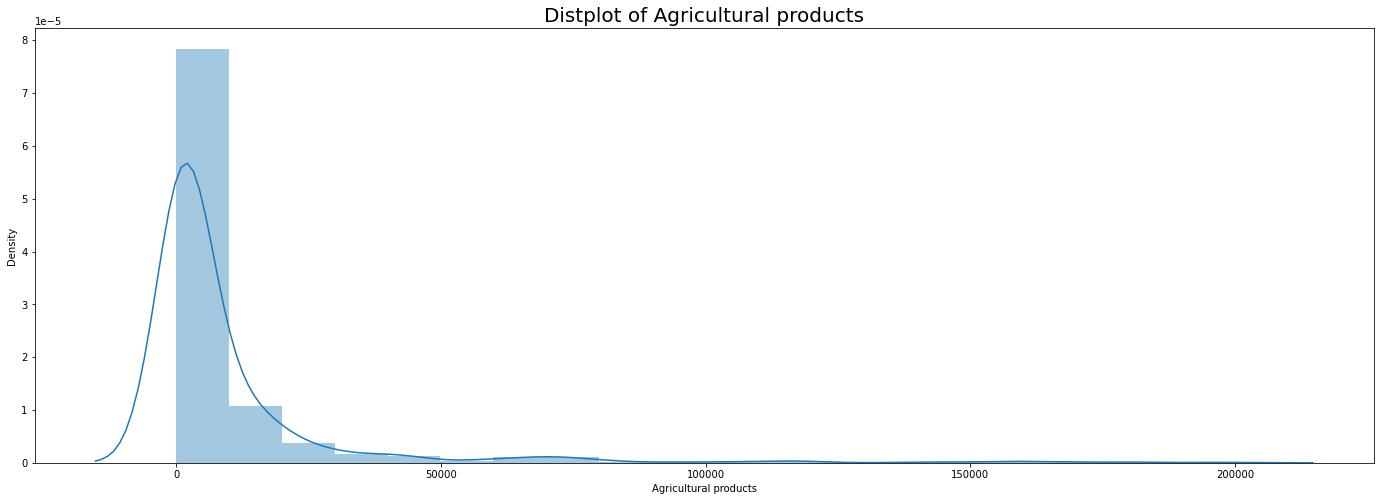

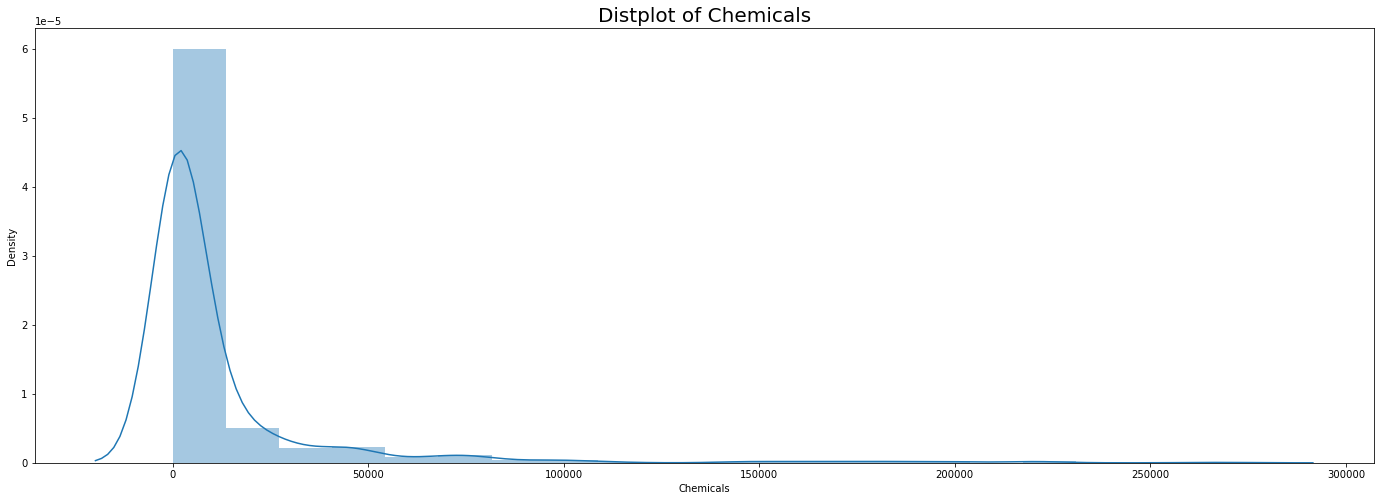

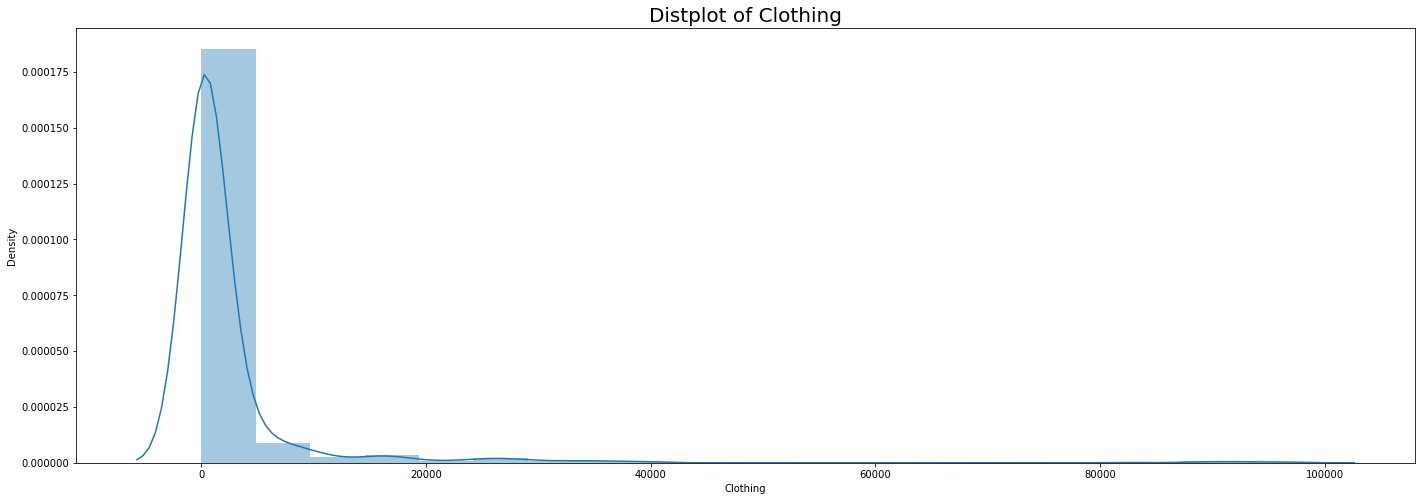

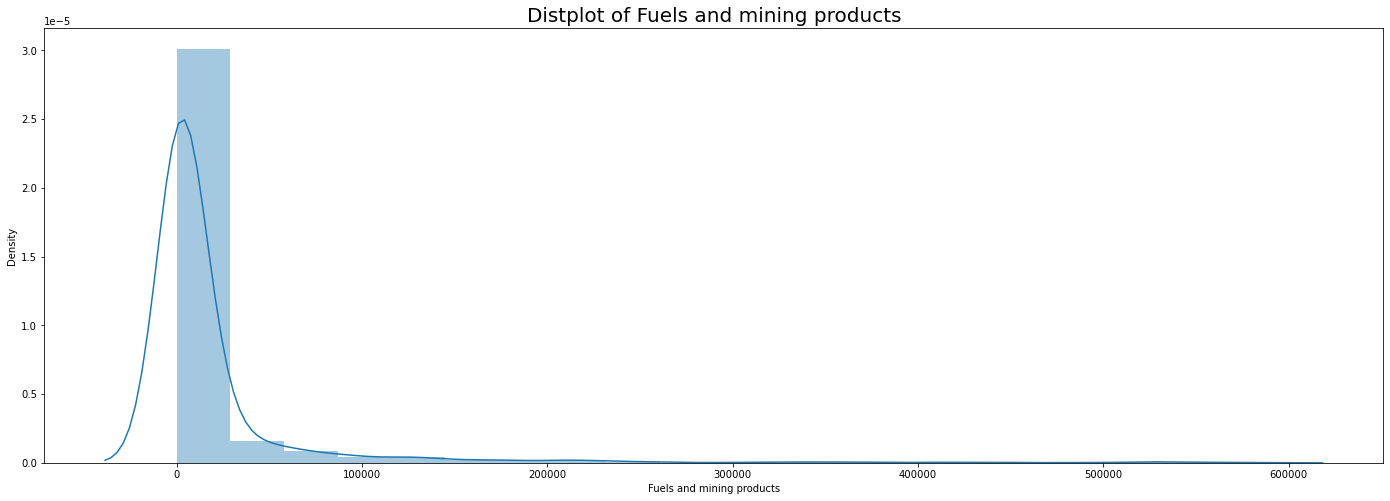

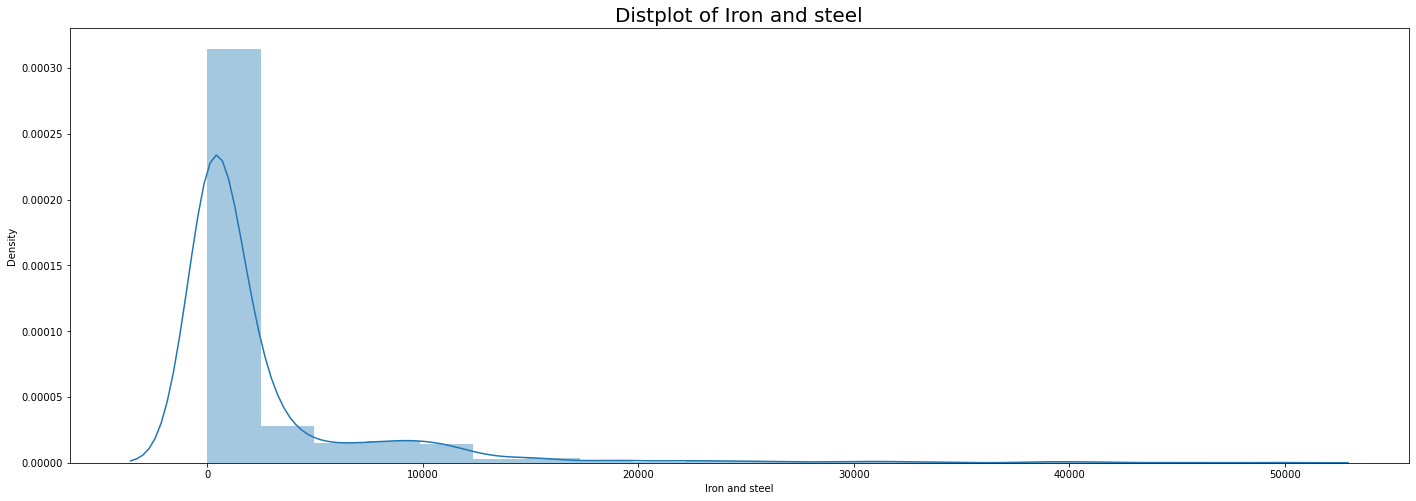

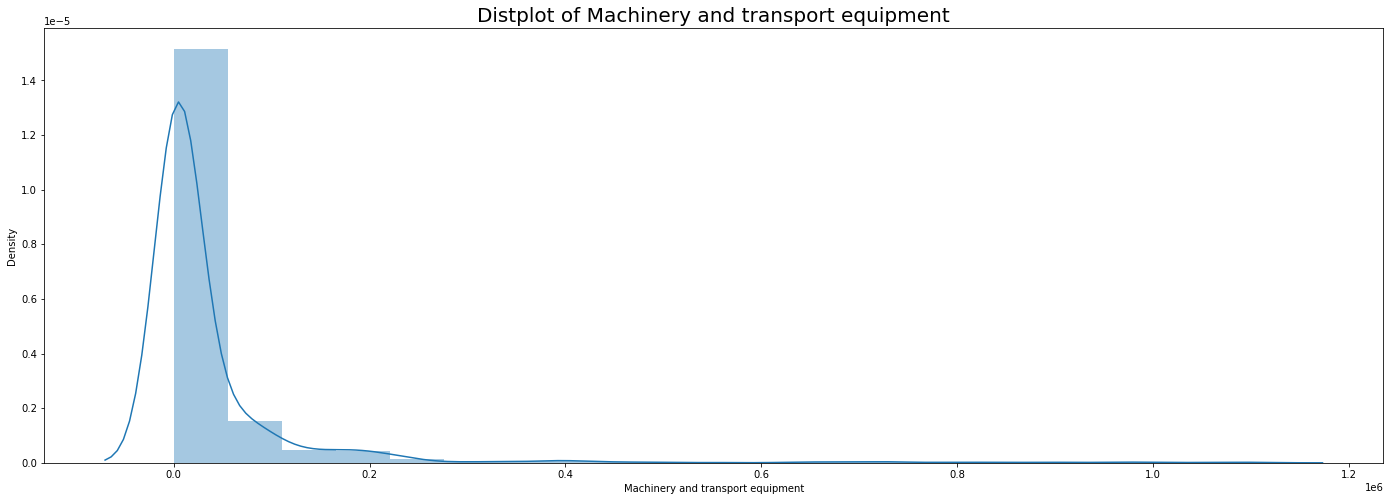

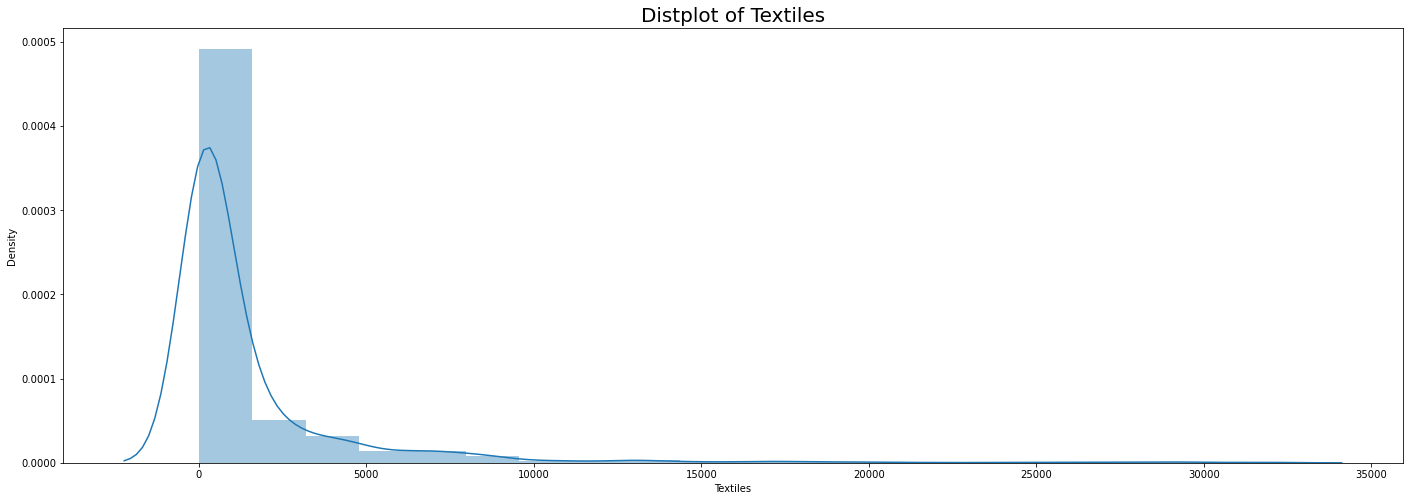

In [21]:
cols_for_dis = df.iloc[:,2:].columns

for x in cols_for_dis:
    plt.figure(1 , figsize = (24 , 8))
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x), size=20)
    plt.show()

####  Correlation of all variables

In [22]:
# Correlation of variables
corr = df.corr()
corr

,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles
Agricultural products,1.000000,0.967031,0.805428,0.896116,0.889142,0.930387,0.890598
Chemicals,0.967031,1.000000,0.821163,0.871162,0.913578,0.928278,0.887162
Clothing,0.805428,0.821163,1.000000,0.661870,0.782685,0.841341,0.811612
Fuels and mining products,0.896116,0.871162,0.661870,1.000000,0.813487,0.845272,0.792726
Iron and steel,0.889142,0.913578,0.782685,0.813487,1.000000,0.854247,0.869975
Machinery and transport equipment,0.930387,0.928278,0.841341,0.845272,0.854247,1.000000,0.908836
Textiles,0.890598,0.887162,0.811612,0.792726,0.869975,0.908836,1.000000


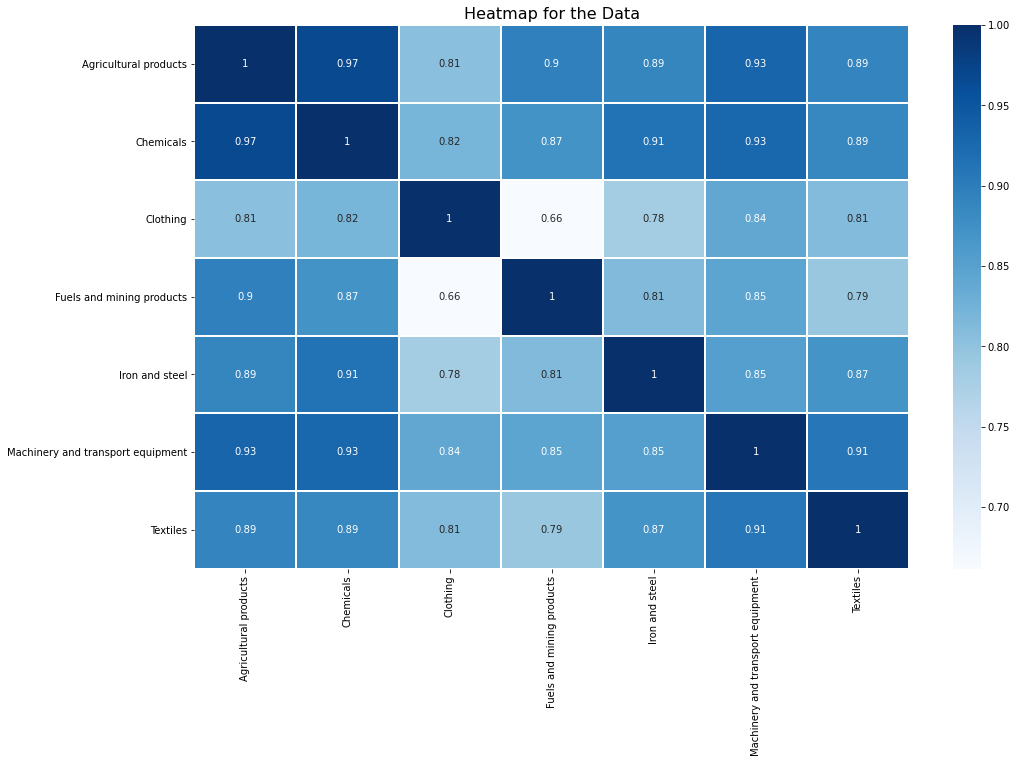

In [23]:
# Heatmap for visualization
plt.figure(figsize=(16,10))
sns.heatmap(corr, cmap="Blues", cbar=True, 
            annot=True, linecolor='white', 
            linewidths=1) 
plt.title('Heatmap for the Data', fontsize = 16)
plt.show()

#### Analytical Transformations

In [24]:
# Review our columns
df.columns

Index(['Year', 'Reporting Economy', 'Agricultural products', 'Chemicals',
       'Clothing', 'Fuels and mining products', 'Iron and steel',
       'Machinery and transport equipment', 'Textiles'],
      dtype='object')

In [25]:
'''
    Feature slection for the model
'''
# Save some usefull variable for our clusters
countries = df['Reporting Economy'].tolist()
years = df['Year'].tolist()


# We will drop ['Year','Reporting Economy']
X = df.drop(['Year','Reporting Economy'], axis=1)
y = df['Reporting Economy']

'''
Checking the shape of:
'''
# --> the data
print('X:', X.shape)
    
# --> the target variable
print('y:', y.shape)

X: (1750, 7)
y: (1750,)


>##### Scaling the data

In [26]:
# Importing the StandardScaler & MinMaxScaler Module from Sklearn
from sklearn.preprocessing import StandardScaler as ss, MinMaxScaler, RobustScaler

In [27]:
# Creating object for the MinMaxScaler function
scala = RobustScaler()

In [28]:
scala.fit_transform(X)

scaled_array = scala.transform(X)
scaled_array

array([[-1.62385162e-01, -1.77650253e-01, -1.92443599e-01, ...,
        -2.22923504e-01, -1.55128993e-01, -1.27442997e-01],
       [-1.39365575e-01, -1.30507220e-01, -1.73960315e-02, ...,
        -1.38601363e-01, -1.29294244e-01, -8.67263844e-02],
       [ 7.58953025e-01,  3.61656177e-01, -6.52351182e-03, ...,
         2.39914163e+00,  6.34228633e-01,  6.22964169e-02],
       ...,
       [-8.32033281e-04, -1.46920893e-01, -1.40255504e-01, ...,
        -1.36076748e-01, -1.48959501e-01, -1.65716612e-01],
       [-1.81244583e-01, -1.05516475e-02, -1.28295733e-01, ...,
        -1.13355213e-01, -6.61533456e-02, -1.82003257e-01],
       [-2.04264171e-01, -7.73170431e-02, -1.91356347e-01, ...,
        -1.71421358e-01, -1.15557484e-01, -1.69788274e-01]])

In [29]:
# Convert the scaled array to dataframe
X_scaled = pd.DataFrame(scaled_array, columns=list(X.columns))

In [30]:
# Display the Scale Dataframe
display(X_scaled.head())
display(X_scaled.shape)

,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles
0,-0.162385,-0.177650,-0.192444,-0.089726,-0.222924,-0.155129,-0.127443
1,-0.139366,-0.130507,-0.017396,-0.119242,-0.138601,-0.129294,-0.086726
2,0.758953,0.361656,-0.006524,-0.048424,2.399142,0.634229,0.062296
3,0.139366,-0.068925,-0.067410,0.129900,0.284019,0.140621,-0.135586
4,-0.244618,-0.183697,-0.196793,-0.200820,-0.241101,-0.166697,-0.213762


(1750, 7)

#### Outliers in the dataset

>##### 1. Outlier detection using visualization (Boxplot)

In [31]:
X_scaled.describe()

,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000
mean,1.076641,1.272511,2.414885,1.752206,1.041539,1.572727,0.986020
std,3.147002,3.622219,9.231863,5.872581,2.673294,5.021606,2.694488
min,-0.260288,-0.187770,-0.205491,-0.201332,-0.244130,-0.171420,-0.223534
25%,-0.184607,-0.150346,-0.172873,-0.150961,-0.198561,-0.133006,-0.186075
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.815393,0.849654,0.827127,0.849039,0.801439,0.866994,0.813925
max,27.390536,33.353388,105.147051,59.209275,24.685433,52.995240,25.739821


In [32]:
# Define a function called "plt_boxplot"
def plt_boxplot(X_scaled, col):
    plt.figure(figsize=(20,4))
    bplt = sns.boxplot(X_scaled[col])
    bplt.axes.set_title("Box plot to identy outliers in {}'s variable".format(col),fontsize=18)
    bplt.set_xlabel(col,fontsize=14)
    bplt.tick_params(labelsize=12)
    plt.show()

In [33]:
X_scaled.columns

Index(['Agricultural products', 'Chemicals', 'Clothing',
       'Fuels and mining products', 'Iron and steel',
       'Machinery and transport equipment', 'Textiles'],
      dtype='object')

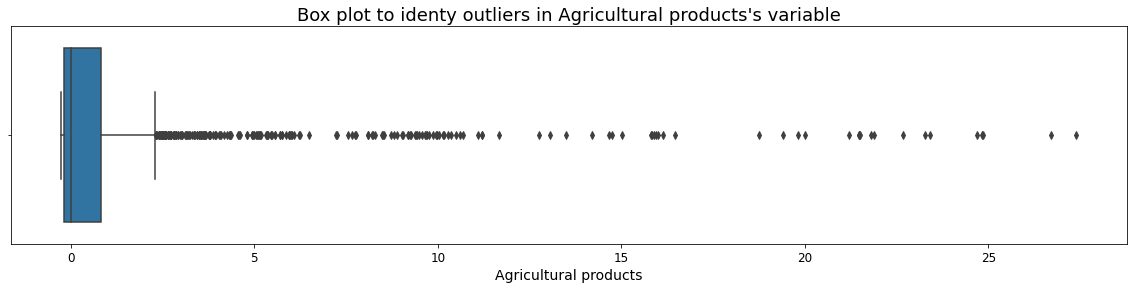

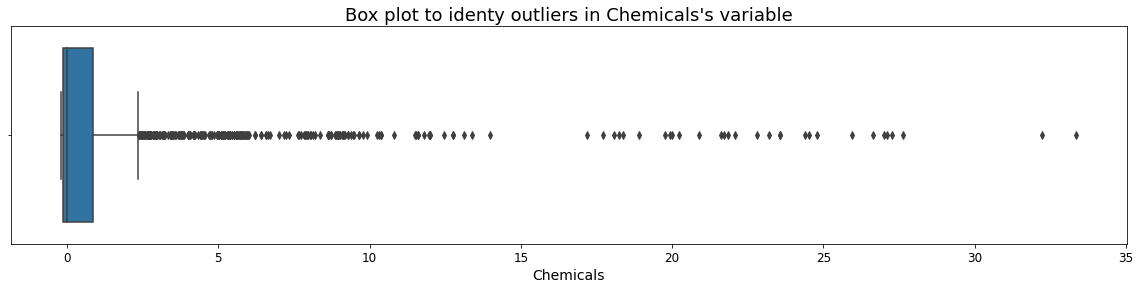

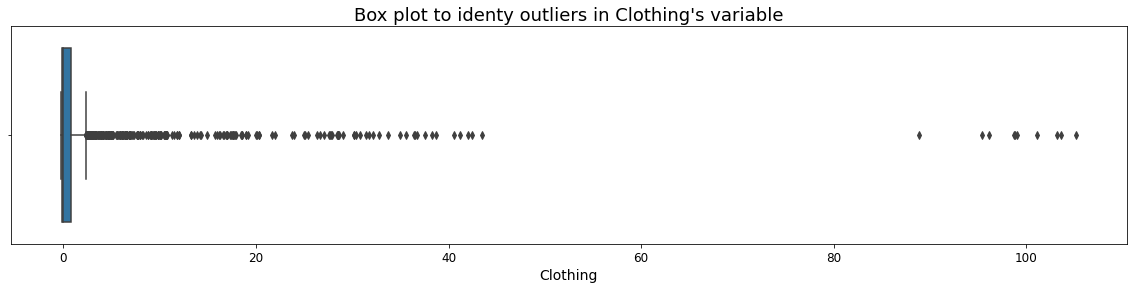

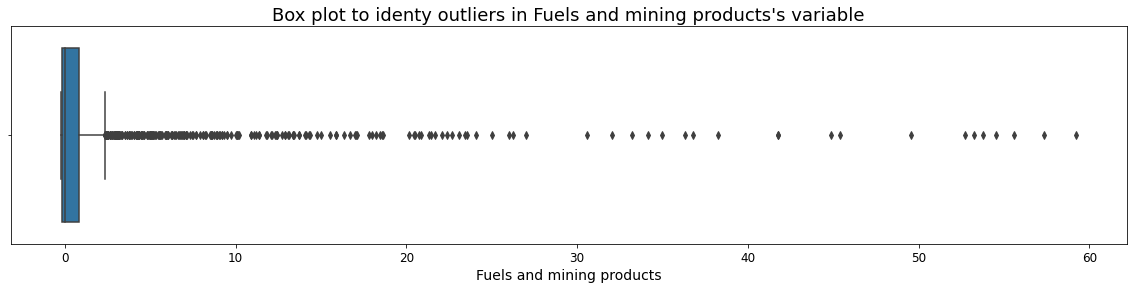

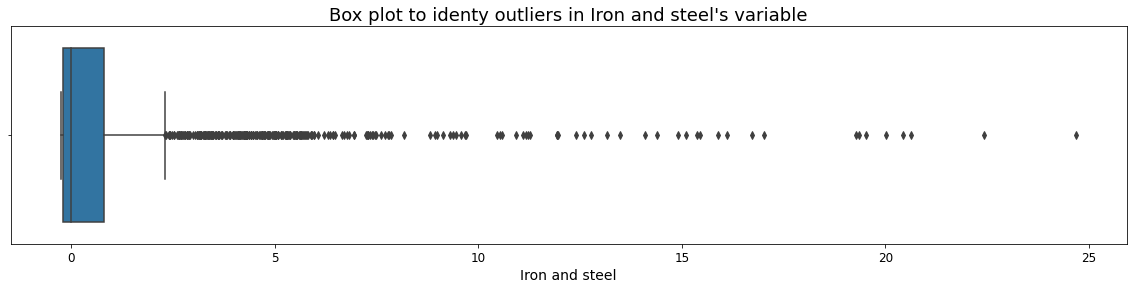

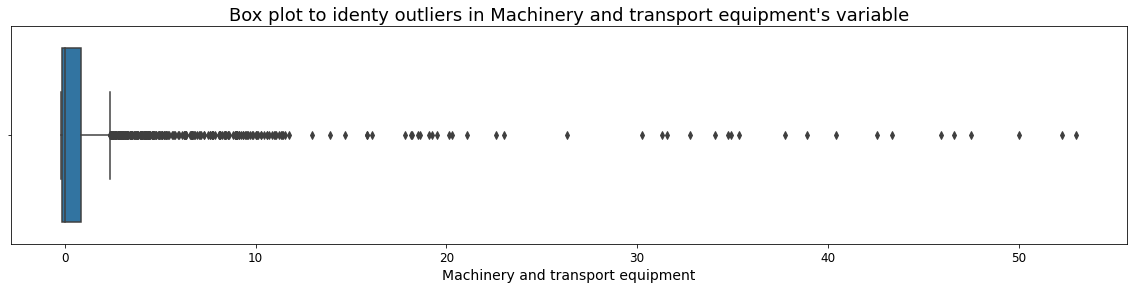

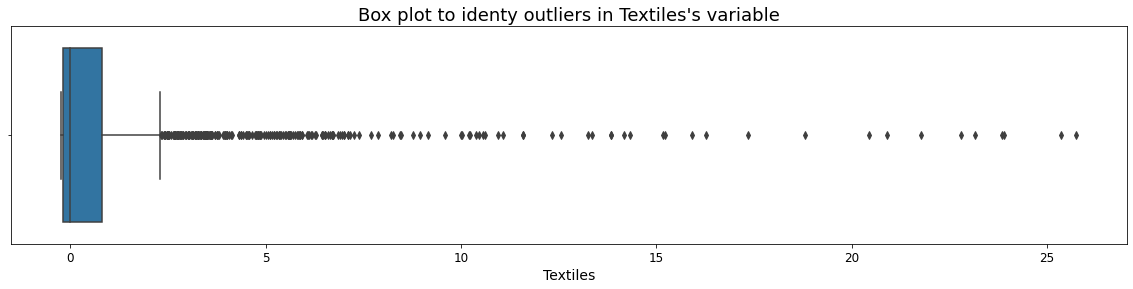

In [34]:
# Identify if there are any outliers in the dataset based on statistical measures.
cols = X_scaled.columns

for col in cols:
    plt_boxplot(X_scaled, col)

**Conclusion**: as we can see in our boxplots we identified so many outliers in our data...

####  PCA: Principal Component Analysis

In [35]:
# PCA with data scaled with MinMaxScaler()
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)

In [36]:
pca_array = pca.fit_transform(X)

In [37]:
pca_array

array([[-42816.78589613,    238.91823393],
       [-42348.45645402,    714.2627114 ],
       [-26274.60992446,   6710.09747719],
       ...,
       [-42317.04184537,    -47.26977077],
       [-40717.55362628,    566.88628688],
       [-41805.06985438,    236.99970358]])

In [38]:
# Convert to dataframe
X_pca = pd.DataFrame(data=pca_array, columns=['PC1','PC2'])

In [39]:
# Overview the PCA dataframe
X_pca

,PC1,PC2
0,-42816.785896,238.918234
1,-42348.456454,714.262711
2,-26274.609924,6710.097477
3,-36032.575446,1003.029870
4,-43606.531115,1125.489054
...,...,...
1745,-41918.507504,584.975385
1746,72194.704803,26036.544786
1747,-42317.041845,-47.269771
1748,-40717.553626,566.886287


#### Building the Model using K-Means algorithms

>##### Find the optimal K for the cluster using KElbowVisualizer

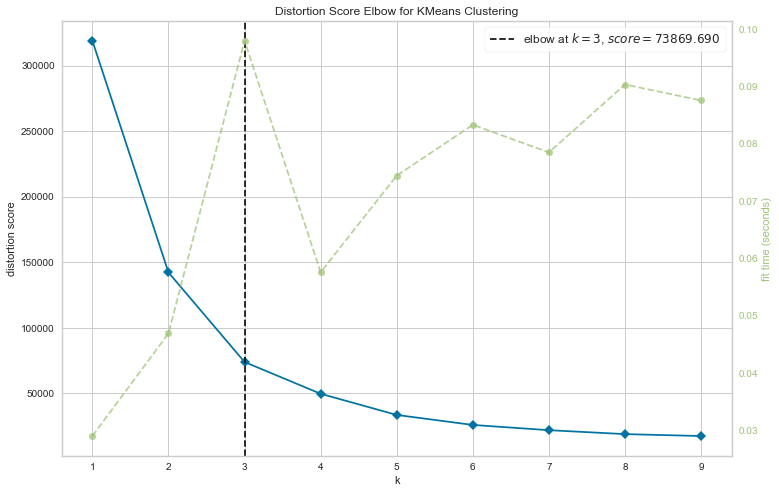

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
argo = X_scaled[['Agricultural products']]

# Load Yellowbrick module for Kelbow visualizer
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()

plt.figure(figsize=(12,8))
visualizer = KElbowVisualizer(km, k=(1,10))
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

**Conclusion**: The optimal number of clusters based on the Kelbow visualizer Score is 3. 
But a choice of 2 or 3 clusters seems to be fair. Let's see the silhouette score.

>##### Silhouettes Plot

In [45]:
from yellowbrick.cluster import SilhouetteVisualizer

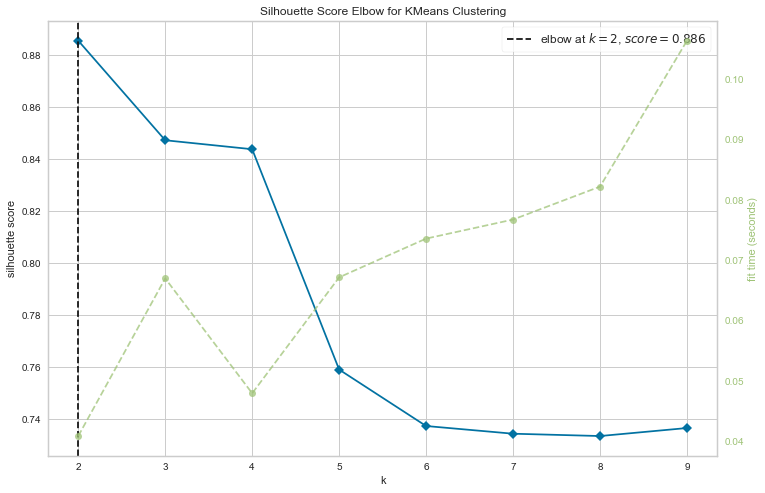

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [46]:
# Instantiate the clustering model and visualizer
plt.figure(figsize=(12,8))

visualizer = KElbowVisualizer(km, k=(2,10),metric='silhouette')
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

**Conclusion**: The optimal number of clusters based on Silhouette Score is 2. We are going to use 2 for ou optimal K number

>##### 1. Creating our K-Means modele

In [79]:
X_model = X_scaled.copy()

# init model
kmean_model = KMeans(n_clusters=2, init="k-means++", random_state=0)
kmean_model.fit_predict(X)

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [80]:
# Labels and Centroid/Cluster Centers
print('------ Labels Clusters ------')
kmean_clusters = kmean_model.labels_
display(kmean_clusters)

print('------ Centroids ------')
kmean_centroids = kmean_model.cluster_centers_
display(kmean_centroids)

------ Labels Clusters ------


array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

------ Centroids ------


array([[143558.66666667, 188076.86666667,  44608.66666667,
        336840.53333333,  30826.        , 688451.56666667,
         20024.36666667],
       [  7305.15639535,   8758.63255814,   1674.06918605,
         13520.01511628,   2053.01627907,  24810.5494186 ,
          1161.97674419]])

In [81]:
# Add more variables to the Dataset before visualization
X_model['countries'] = countries
X_model['cluster'] = kmean_clusters

In [83]:
# Display the final dataframe
display(X_model.head())
display(X_model.shape)

,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles,countries,cluster
0,-0.162385,-0.177650,-0.192444,-0.089726,-0.222924,-0.155129,-0.127443,Afghanistan,1
1,-0.139366,-0.130507,-0.017396,-0.119242,-0.138601,-0.129294,-0.086726,Albania,1
2,0.758953,0.361656,-0.006524,-0.048424,2.399142,0.634229,0.062296,Algeria,1
3,0.139366,-0.068925,-0.067410,0.129900,0.284019,0.140621,-0.135586,Angola,1
4,-0.244618,-0.183697,-0.196793,-0.200820,-0.241101,-0.166697,-0.213762,Antigua and Barbuda,1


(1750, 9)

>##### 2. Clusters profile

In [117]:
# Choose which cluster can be use as our target
cluster_profil = X_model.groupby('cluster').mean()
cluster_profil['Observation']=X_model.cluster.value_counts().sort_index()
cluster_profil

,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles,Observation
cluster,,,,,,,,
0,19.647310,23.023000,48.295370,34.319757,15.320626,33.011318,16.082953,30
1,0.752734,0.893142,1.614644,1.184168,0.792485,1.024379,0.722701,1720


**Conclusion**: As we can see in this cluster profil dataframe above,

<ul>
    <li> <strong>Cluster 0:</strong> Country that have been imported more, this is our target cluster </li>
    <li> <strong>Cluster 1:</strong> Country that have been imported Less </li>
</ul>

>##### 3. Visualizing the clusters

In [122]:
#Visualizing all the clusters 
df00 = X_model[X_model['cluster'] == 0]
df01 = X_model[X_model['cluster'] == 1]

In [88]:
%matplotlib inline

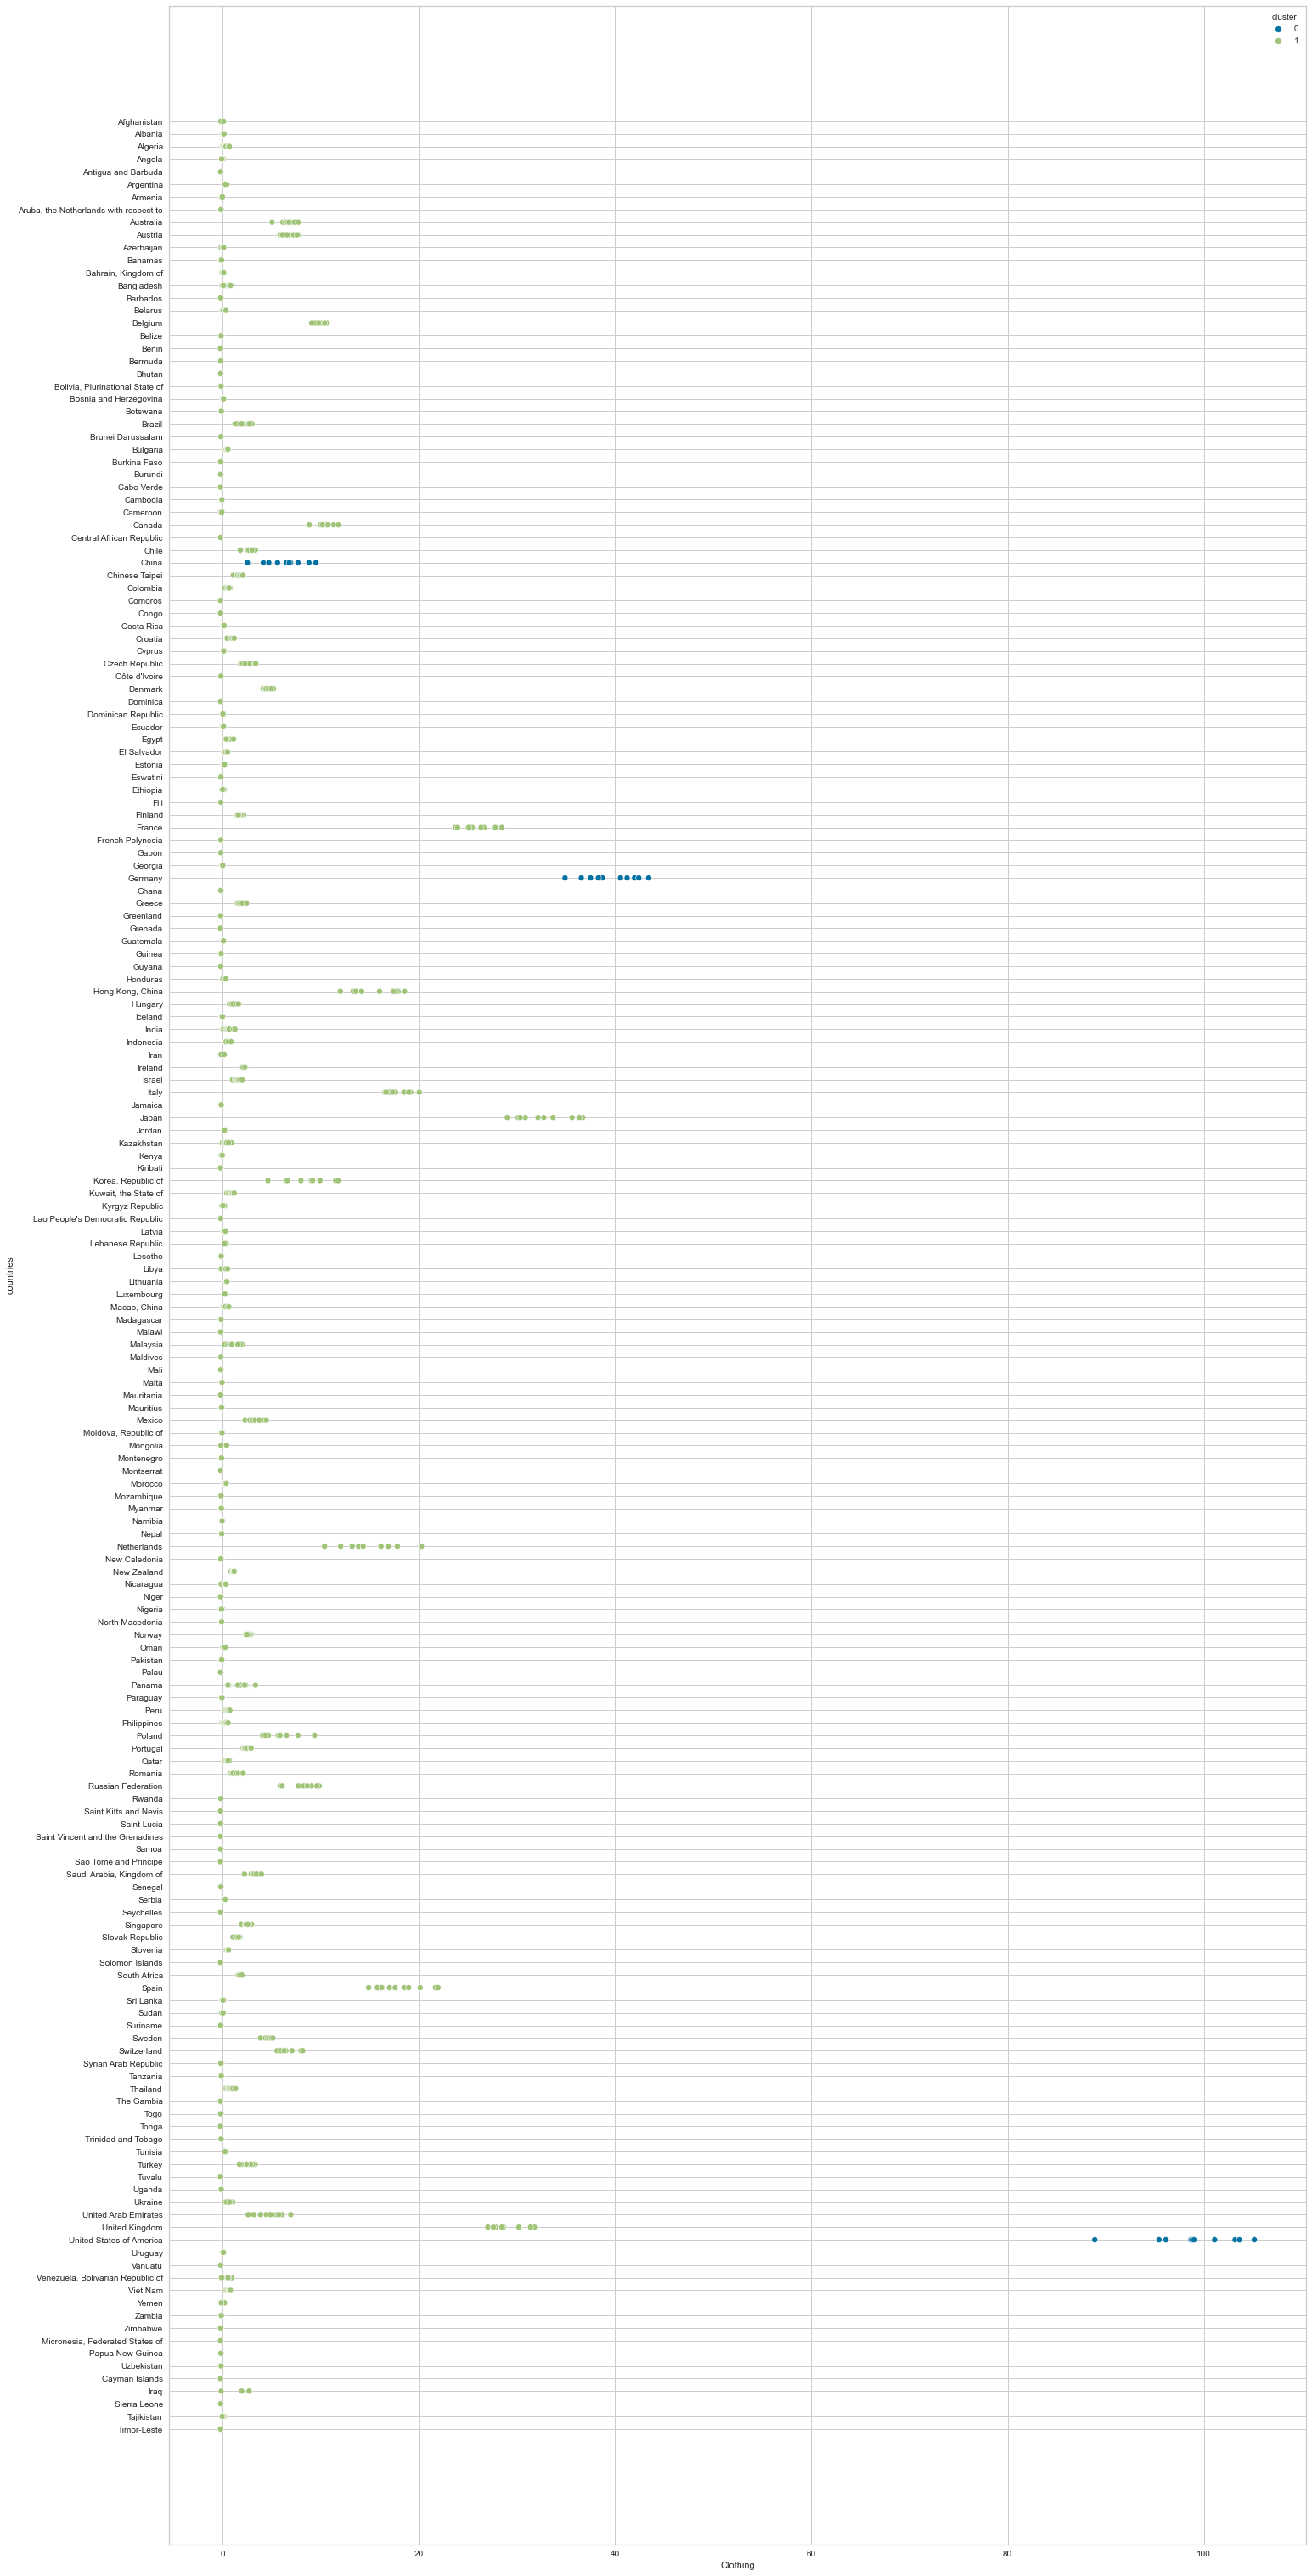

In [107]:
# Visualize the PCA dataframe with a scatterplot
plt.figure(figsize=(24,55))
ln = sns.scatterplot(data=X_model, x='Clothing', y='countries', hue='cluster')

plt.show()

<br><br>

<h1 align="center"> Reflections </h1>

#### Summary of Data Analysis

>##### Plot for annual imported pructs of different countries with quantity in y-axis and years in x-axis

In [ ]:
df.columns

In [ ]:
df.iloc[:,2:].columns

In [ ]:
plt.figure(figsize=(24,12))
ln = sns.lineplot(data=df, x="Year", y="Agricultural products", hue="Reporting Economy")
    
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=8, mode="expand", borderaxespad=0.)
plt.show()

>##### Total Products imported by countries from 2010 to 2019

In [ ]:
# Reviews the cleaned df
df.head(3)

In [ ]:
# Calculate the total imported per countries & Per Year products
df['Total'] = df.iloc[:,2:].sum(axis=1)

In [ ]:
# The Dataframe with the new ['Total'] column
df.tail(2)

In [ ]:
# GroupBy Years
gb_y = df.groupby(by='Year')
gb_y.sum()

In [ ]:
gb_total = df.groupby(by=['Year', 'Reporting Economy']).sum()
gb_total

In [ ]:
# Display a graph to show more details
gb_total = df.groupby(by='Reporting Economy').sum()

In [ ]:
# Figure 1
plt.figure(figsize=(16,7))

sns.lineplot(x ='Year', y='Agricultural products', data=df)
plt.show()

In [ ]:
# Figure 2

#### Questions unanswered

In [ ]:
# What aspects of the research question were we unable to answer and why?

#### Recommendations

In [ ]:
# What should the reader do next with this information?

#### Next Steps

In [ ]:
# What will the analyst do next based on the analysis?